# Pymaceuticals Inc.
---

### Analysis

- Interesting enough, Stelasyn and Naftisol had similar results as the Placebo possibly concluding that these drugs are ineffective, more testing is recommended. Gender did not have a large impact on the increase/decrease of the tumors. Even though Capomulin was one of the better testing drugs, along with Ramicane it may not be permanent. As the line chart shows prolonged use of using Capomulin may cause adverse results as volume of the tumor on the mouse in question increased after 15 days of drastic decrease. Obviously more testing would need to be done to show if this is or is not an outlier

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_num = len(combined_df['Mouse ID']. unique())
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_id) ==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = len(clean_df['Mouse ID'].unique())
clean_mice_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":standev,
                              "Tumor Volume Std. Err": sem})  

summary_stats                              


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# first, group series

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

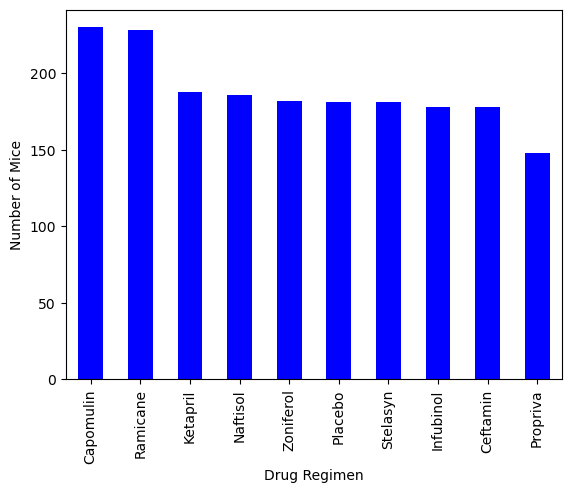

In [10]:
mice_bar = mice_count.plot.bar(color = 'b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


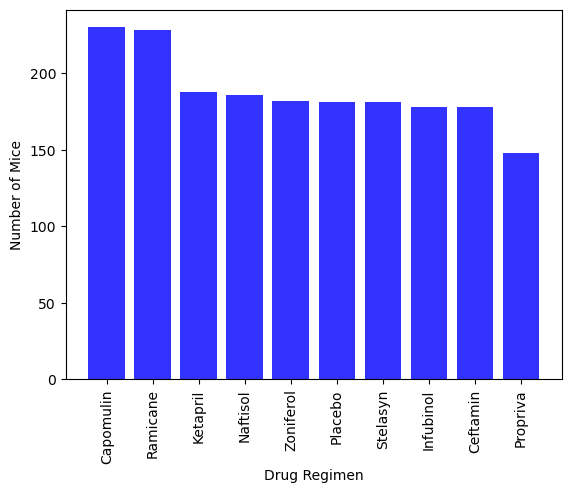

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color ='b', alpha = 0.8, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = "vertical")

plt.show()


Male      958
Female    922
Name: Sex, dtype: int64

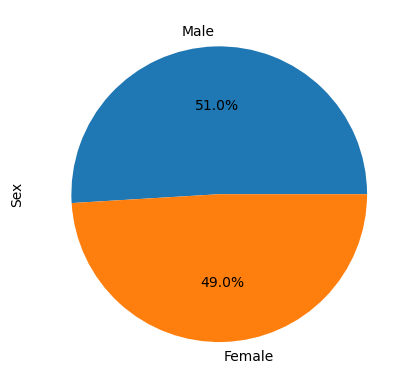

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df["Sex"].value_counts()
gender_dist.plot.pie(autopct = "%1.1f%%")

gender_dist

Text(0, 0.5, 'Sex')

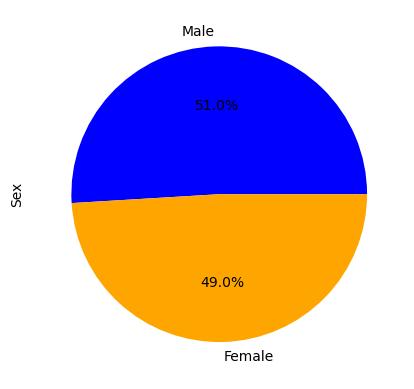

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
sizes = [50.95745, 49.04255]
colors = ['blue', 'orange']
explode = (0,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 0)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:
# Capomulin 
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumors: {lowerq}")
print(f"The upper quartile of Capomulin Tumors: {upperq}")
print(f"The interquartile range of Capomulin Tumors: {iqr}")
print(f"The median of Capomulin Tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers")
print(f"Values above {upper_bound} are potential outliers")

The lower quartile of Capomulin Tumors: 32.37735684
The upper quartile of Capomulin Tumors: 40.1592203
The interquartile range of Capomulin Tumors: 7.781863460000004
The median of Capomulin Tumors: 38.1251644
Values below 20.70456164999999 are potential outliers
Values above 51.83201549 are potential outliers


In [17]:
# Ramicane

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumors: {lowerq}")
print(f"The upper quartile of Ramicane Tumors: {upperq}")
print(f"The interquartile range of Ramicane Tumors: {iqr}")
print(f"The median of Ramicane Tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers")
print(f"Values above {upper_bound} are potential outliers")

The lower quartile of Ramicane Tumors: 31.56046955
The upper quartile of Ramicane Tumors: 40.65900627
The interquartile range of Ramicane Tumors: 9.098536719999998
The median of Ramicane Tumors: 36.56165229
Values below 17.912664470000003 are potential outliers
Values above 54.30681135 are potential outliers


In [19]:
# Infubinol

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumors: {lowerq}")
print(f"The upper quartile of Infubinol Tumors: {upperq}")
print(f"The interquartile range of Infubinol Tumors: {iqr}")
print(f"The median of Infubinol Tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers")
print(f"Values above {upper_bound} are potential outliers")

The lower quartile of Infubinol Tumors: 54.04860769
The upper quartile of Infubinol Tumors: 65.52574285
The interquartile range of Infubinol Tumors: 11.477135160000003
The median of Infubinol Tumors: 60.16518046
Values below 36.83290494999999 are potential outliers
Values above 82.74144559000001 are potential outliers


In [21]:
# Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors: {upperq}")
print(f"The interquartile range of Ceftamin Tumors: {iqr}")
print(f"The median of Ceftamin Tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers")
print(f"Values above {upper_bound} are potential outliers")

The lower quartile of Ceftamin Tumors: 48.72207785
The upper quartile of Ceftamin Tumors: 64.29983003
The interquartile range of Ceftamin Tumors: 15.577752179999997
The median of Ceftamin Tumors: 59.85195552
Values below 25.355449580000002 are potential outliers
Values above 87.66645829999999 are potential outliers


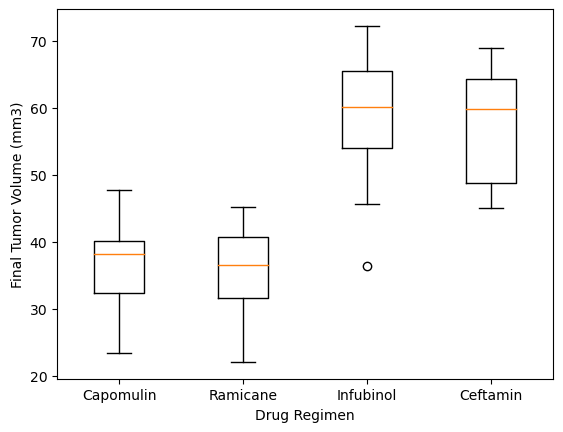

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

volumes = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen = ["Capomulin", "Ramicane", 'Infubinol', "Ceftamin"]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
bp = ax.boxplot(volumes, labels = regimen, widths = 0.4, vert = True)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
plt.show()
    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

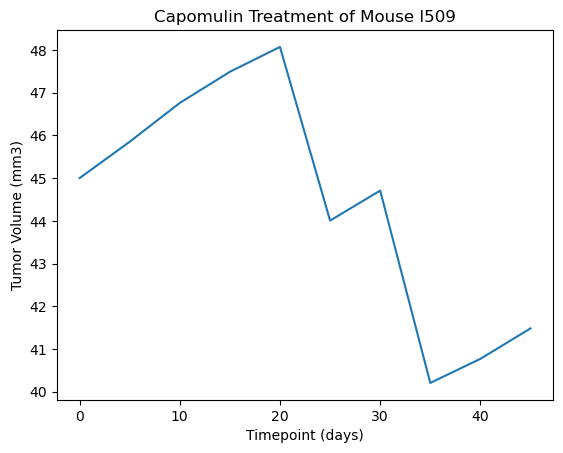

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Note to self mouse ID is "L" not 1

treatment_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
treatment_line_df.head()
x_axis = treatment_line_df["Timepoint"]
tumor_size = treatment_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(x_axis, tumor_size)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

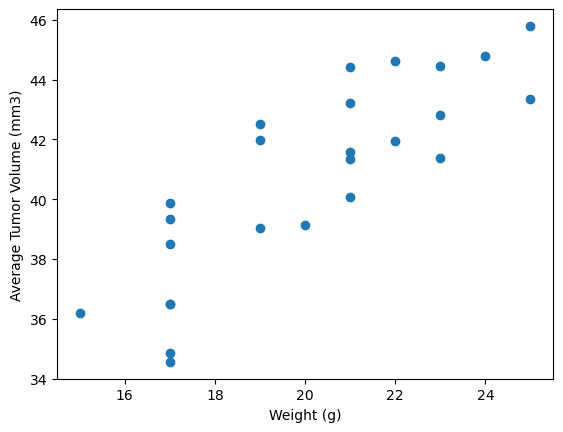

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_cap_vol = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


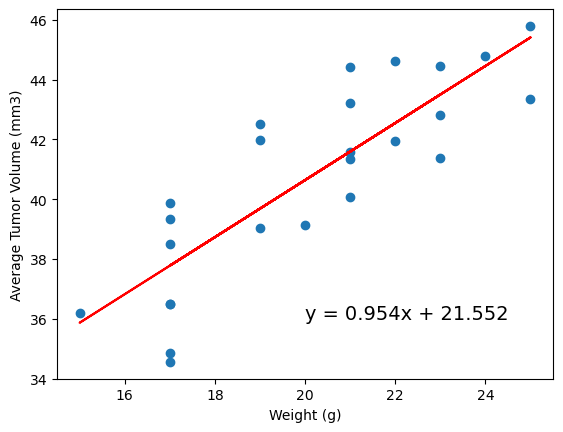

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_co = st.pearsonr(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_co[0],2)}")

# add lre and line to scatterplot
x_values = avg_cap_vol["Weight (g)"]
y_values = avg_cap_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,3)}x + {round(intercept,3)}"

plt.scatter(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])
plt.plot(avg_cap_vol["Weight (g)"], regress_values, color = "r")
plt.annotate(line_eq, (20,36), fontsize = 14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()